In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = './'

In [2]:
df = pd.read_csv(path + 'train.csv')
df.head()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,2017,190590,12,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3416326.0,7657
1,2017,190590,36,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,438747025.0,5294788
2,2017,190590,40,Austria,1.664750e+11,1.948099e+10,0.0,4403.247293,4.172380e+11,3.955690e+11,8797566,NaN,78.856460,8289.029297,453206357.0,335818
3,2017,190590,56,Belgium,4.064120e+11,1.948099e+10,0.0,3980.375563,5.026980e+11,4.757400e+11,11375158,NaN,72.409200,8722.114258,706524512.0,173709
4,2017,190590,76,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,31329648.0,122850


In [3]:
idx = df[df['TARIFF_AVG'].isnull()].index
df = df.drop(idx)
idx = df[df["KR_TRADE_HSCD_COUNTRYCD"] == 0.0].index
df = df.drop(idx)
idx = df[df["TRADE_HSCD_COUNTRYCD"].isnull()].index
df = df.drop(idx)
idx = df[df['PA_NUS_FCRF'].isnull()].index
df = df.drop(idx)
idx = df[df['SNDIST'].isnull()].index
df = df.drop(idx)

In [4]:
df.head()
df.to_csv('./main_clearNull.csv')

In [5]:
df['_HSCD'] = df['HSCD'].copy()

In [6]:
hcsd_uniq = df['HSCD'].unique()
for i in range(len(df['HSCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['HSCD'].iloc[i]:
      df['HSCD'].iloc[i] = (x+1)
      break

df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD
0,2017,1,12,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3.416326e+06,7657,190590
1,2017,1,36,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,4.387470e+08,5294788,190590
4,2017,1,76,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,3.132965e+07,122850,190590
5,2017,1,104,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,53382581,1360.358707,42.671390,3796.142578,1.276182e+07,631082,190590
6,2017,1,124,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,36543321,1.297936,79.540940,10617.703130,1.113991e+09,7273171,190590


In [7]:
hcsd_uniq = df['COUNTRYCD'].unique()
for i in range(len(df['COUNTRYCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['COUNTRYCD'].iloc[i]:
      df['COUNTRYCD'].iloc[i] = (x+1)
      break
#df['TARIFF_AVG'] = df['TARIFF_AVG'] / 100
#df['IC_BUS_EASE_DFRN_DB'] = df['IC_BUS_EASE_DFRN_DB'] / 100
#df['KMDIST'] = df['KMDIST']/100 # total -> divided 10000
#df['gdp_percent'] = df['gdp_percent'] / 100


######################################################################
df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD
0,2017,1,1,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3.416326e+06,7657,190590
1,2017,1,2,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,4.387470e+08,5294788,190590
4,2017,1,3,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,3.132965e+07,122850,190590
5,2017,1,4,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,53382581,1360.358707,42.671390,3796.142578,1.276182e+07,631082,190590
6,2017,1,5,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,36543321,1.297936,79.540940,10617.703130,1.113991e+09,7273171,190590


In [8]:
df.head()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD
0,2017,1,1,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3.416326e+06,7657,190590
1,2017,1,2,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,4.387470e+08,5294788,190590
4,2017,1,3,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,3.132965e+07,122850,190590
5,2017,1,4,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,53382581,1360.358707,42.671390,3796.142578,1.276182e+07,631082,190590
6,2017,1,5,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,36543321,1.297936,79.540940,10617.703130,1.113991e+09,7273171,190590


<AxesSubplot:>

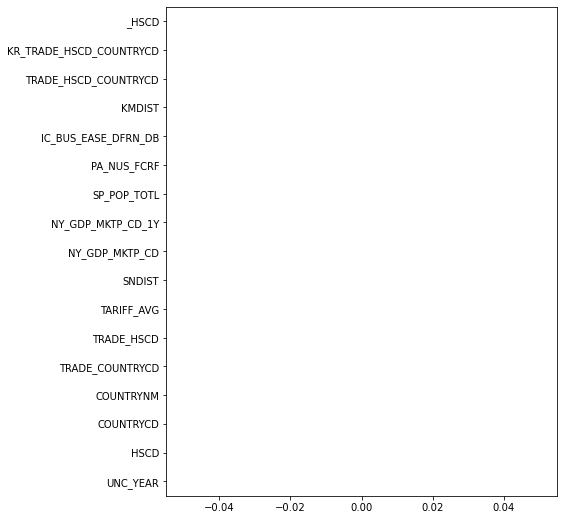

In [9]:
df.isnull().mean().plot.barh(figsize=(7,9))

In [10]:
df.shape


(17269, 17)

In [11]:
df["item_total_percent"] = df["TRADE_HSCD_COUNTRYCD"]/ df["TRADE_COUNTRYCD"] * 100
df["item_world_percent"] = df["TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD"] * 100
df["gdp_percent"] = df["NY_GDP_MKTP_CD"] / df["NY_GDP_MKTP_CD_1Y"] * 100
df["next_year_percent"] = df["KR_TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD_COUNTRYCD"] * 100
df["next_year_percent"]

0        0.224130
1        1.206797
4        0.392121
5        4.945077
6        0.652893
           ...   
21098    0.870154
21099    2.552436
21100    0.412353
21101    0.273898
21102    6.848066
Name: next_year_percent, Length: 17269, dtype: float64

In [12]:
df.head()
# df = df.drop('KR_TRADE_HSCD_COUNTRYCD', axis=1).copy()
# df = df.drop('TRADE_HSCD_COUNTRYCD', axis=1).copy()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,...,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,2017,1,1,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,...,110.973017,46.109810,9954.009766,3.416326e+06,7657,190590,0.007418,0.017537,106.355199,0.224130
1,2017,1,2,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,...,1.304758,80.223690,8329.652344,4.387470e+08,5294788,190590,0.192061,2.252181,109.954916,1.206797
4,2017,1,3,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,...,3.191389,55.382403,18364.505860,3.132965e+07,122850,190590,0.020783,0.160822,114.876093,0.392121
5,2017,1,4,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,...,1360.358707,42.671390,3796.142578,1.276182e+07,631082,190590,0.066283,0.065509,102.622089,4.945077
6,2017,1,5,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,...,1.297936,79.540940,10617.703130,1.113991e+09,7273171,190590,0.257627,5.718352,107.959483,0.652893


In [13]:
copy_df = df.copy()

In [14]:

df['KMDIST'] = df['KMDIST'] / 100
df['SNDIST'] = df['SNDIST'] / 100
df['SP_POP_TOTL'] = (df['SP_POP_TOTL'] - df['SP_POP_TOTL'].min()) / (df['SP_POP_TOTL'].max() - df['SP_POP_TOTL'].min())
# 'SP_POP_TOTL', 
df = df.drop(columns=['_HSCD'])
df = df.drop(columns=['UNC_YEAR', 'COUNTRYNM'])
df = df.drop(columns=['KR_TRADE_HSCD_COUNTRYCD', 'TRADE_HSCD_COUNTRYCD', 'TRADE_COUNTRYCD', 'TRADE_HSCD', 'NY_GDP_MKTP_CD', 'NY_GDP_MKTP_CD_1Y'])

In [15]:
df.head()

,HSCD,COUNTRYCD,TARIFF_AVG,SNDIST,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,1,1,30.0,38.782384,0.027670,110.973017,46.109810,99.540098,0.007418,0.017537,106.355199,0.224130
1,1,2,0.0,122.031560,0.015534,1.304758,80.223690,83.296523,0.192061,2.252181,109.954916,1.206797
4,1,3,18.0,96.442069,0.147996,3.191389,55.382403,183.645059,0.020783,0.160822,114.876093,0.392121
5,1,4,5.0,58.916600,0.036340,1360.358707,42.671390,37.961426,0.066283,0.065509,102.622089,4.945077
6,1,5,0.0,79.117838,0.024167,1.297936,79.540940,106.177031,0.257627,5.718352,107.959483,0.652893


In [16]:
df.to_csv('./norm.csv')

In [17]:
print(df.shape)
tr = int(df.shape[0]*6/10) # Train
te = int((df.shape[0] - tr)/2) # Test (actually Train)
va = df.shape[0] - tr - te # Validation (actually Test)
print(tr,te, va)

(17269, 12)
10361 3454 3454


In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opti
torch.manual_seed(1015)
device = torch.device("cuda")

In [19]:
import torch
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

x_train = torch.FloatTensor(df.iloc[:tr+te,:-1].values).to(device)
y_train = torch.FloatTensor(df.iloc[:tr+te,-1].values).to(device)
x_test = torch.FloatTensor(df.iloc[tr+te:,:-1].values).to(device)
y_test = torch.FloatTensor(df.iloc[tr+te:,-1].values).to(device)

max(y_train)
y_train = torch.reshape(y_train, (-1,1))


In [20]:
y_test = y_test.reshape(-1,1)

In [21]:
len(df)

17269

In [22]:
print(x_train.shape)
print(y_train.shape)
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

torch.Size([13815, 11])
torch.Size([13815, 1])


In [26]:
class DeepModel(nn.Module):
  def __init__(self, in_channel, out_channel):
    super(DeepModel, self).__init__()

    self.basic = nn.BatchNorm1d(in_channel)
    self.layer1 = nn.Linear(in_channel, 256)
    self.dropout1 = nn.Dropout(0.5)
    self.bn1 = nn.BatchNorm1d(256)
    self.layer2 = nn.Linear(256, 64)
    self.dropout2 = nn.Dropout(0.5)
    self.bn2 = nn.BatchNorm1d(64)
    self.head = nn.Linear(64, out_channel)

  def forward(self, x):
    x = x.to(device)
    x = self.basic(x)
    x = F.relu(self.bn1(self.layer1(x)))
    x = self.dropout1(x)
    x = F.relu(self.bn2(self.layer2(x)))
    x = self.dropout2(x)
    
    return self.head(x)


# model = nn.Linear(9,1).to(device)
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=11, out_features=256, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-5)

# L2 Loss model

In [ ]:
n_epochs = 100
loss_list = []
for epoch in range(n_epochs):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    pred = deepmodel(x_train).to(device)
    cost = F.mse_loss(y_train, pred)
    loss_list.append(cost)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

In [ ]:
pred_y = deepmodel(x_test)
torch.mean(torch.abs(pred_y - y_test))

# l1 loss model

In [ ]:
deepmodel2 = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel2.eval()#F.l1_loss
optimizer2 = torch.optim.Adam(deepmodel2.parameters(), lr=1e-5)

In [ ]:
n_epochs = 5
loss_list = []
test_loss_list = []
for epoch in range(n_epochs):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    pred = deepmodel2(x_train).to(device)
    cost = F.l1_loss(y_train, pred)
    loss_list.append(cost)
    with torch.no_grad():
        pred_y = deepmodel2(x_test)
        test_loss_list.append(torch.mean(torch.abs(pred_y - y_test)))
    optimizer2.zero_grad()
    cost.backward()
    optimizer2.step()
    print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

In [ ]:
pred_y = deepmodel2(x_test)
#y_test = y_test.reshape(-1,1)
torch.mean(torch.abs(pred_y - y_test))

In [ ]:
# loss_l = [(loss_list[i*10] - mi)/(ma - mi) for i in range(int(len(loss_list)/10))]
import numpy as np
count = 100
# loss_l = [np.mean([n.item() for n in loss_list[i*10:i*10+10]]) for i in range(10000) if np.mean([n.item() for n in loss_list[i*10:i*10+10]]) < 100]


loss_l = [loss_list[i].item() for i in range(count)]
loss_l = [np.mean([n.item() for n in loss_list[i*10:i*10+10]]) for i in range(count) if np.mean([n.item() for n in loss_list[i*10:i*10+10]]) < 1000]


loss_test_l = [test_loss_list[i].item() for i in range(count)]
loss_test_l = [np.mean([n.item() for n in test_loss_list[i*10:i*10+10]]) for i in range(count) if np.mean([n.item() for n in test_loss_list[i*10:i*10+10]]) < 1000]

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot([i for i in range(len(loss_l))],loss_l, 'blue', label='Train Loss')
plt.plot([i for i in range(len(test_loss_list))][:count],loss_test_l, 'red', label='Test Loss')
plt.legend(loc='upper right')
plt.show()





In [ ]:
loss_l

In [ ]:
torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_L2.pth')
torch.save(deepmodel2.state_dict(), './last_all_feature_and_all_norm_L1.pth')

# train Fin

# L1 case Start

In [35]:
torch.set_printoptions(sci_mode=False)

In [25]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L1.pth"))
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=11, out_features=256, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [26]:
pred_y = deepmodel(x_test)

In [27]:
pred_y.shape

torch.Size([3454, 1])

In [28]:
y_test = y_test.reshape(-1,1)
y_test

tensor([[    0.0005],
        [    0.1658],
        [    0.0533],
        ...,
        [    0.4124],
        [    0.2739],
        [    6.8481]], device='cuda:0')

In [29]:
pred_y.mean()

tensor(2.6136, device='cuda:0', grad_fn=<MeanBackward0>)

In [30]:
torch.mean(torch.abs(pred_y - y_test))

tensor(4.6064, device='cuda:0', grad_fn=<MeanBackward0>)

# test Field

In [107]:
abs(pred_y - y_test).min()

tensor(0.0028, device='cuda:0', grad_fn=<MinBackward1>)

In [121]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp.iloc[:,3]

16908                    Iran
16910                   Japan
16911              Kazakhstan
16912                  Kuwait
16913                Malaysia
                 ...         
21098    United Arab Emirates
21099                  Turkey
21100                   Egypt
21101          United Kingdom
21102                     USA
Name: COUNTRYNM, Length: 3454, dtype: object

In [126]:
tmp = copy_df.iloc[tr+te:,:].copy()
# 3, 14, 15, 16
arr = [(t.item(), p.item(), abs(t.item()-p.item()), d0, d1, c, item_no) for t,p, d0, d1, c, item_no in zip(y_test, pred_y, tmp.iloc[:,14], tmp.iloc[:,15], tmp.iloc[:,3], tmp.iloc[:,16])] # 0: past, 1: next
arr = sorted(arr, key=lambda x : abs(x[0] - x[1]))

In [127]:
arr[:10]

[(6.287664413452148,
  6.284905910491943,
  0.002758502960205078,
  1991093839.0,
  125193297,
  'China',
  840890),
 (0.8550779223442078,
  0.8579413890838623,
  0.002863466739654541,
  16243198.0,
  138892,
  'Brazil',
  820320),
 (2.068004608154297,
  2.0750229358673096,
  0.007018327713012695,
  70528230.0,
  1458527,
  'Australia',
  840734),
 (4.616559982299805,
  4.60947847366333,
  0.007081508636474609,
  39207961.0,
  1810059,
  'Philippines',
  840999),
 (0.4036012887954712,
  0.3961523771286011,
  0.007448911666870117,
  73649172.0,
  297249,
  'Chile',
  841391),
 (1.0005733966827393,
  1.0106834173202515,
  0.010110020637512207,
  9238703.0,
  92440,
  'Poland',
  842119),
 (0.6981349587440491,
  0.6872860193252563,
  0.010848939418792725,
  153437531.0,
  1071201,
  'Norway',
  844399),
 (1.3283586502075195,
  1.3403414487838745,
  0.01198279857635498,
  156652117.0,
  2080902,
  'Poland',
  841459),
 (0.6548638343811035,
  0.6396098136901855,
  0.015254020690917969,
  65

In [128]:
arr[-10:]

[(92.46986389160156,
  3.7928061485290527,
  88.67705774307251,
  118502639.0,
  109579232,
  'India',
  842890),
 (102.65850830078125,
  2.5956149101257324,
  100.06289339065552,
  1833623.0,
  1882370,
  'Egypt',
  830230),
 (113.88651275634766,
  8.58624267578125,
  105.3002700805664,
  4900496.0,
  5581004,
  'Viet Nam',
  830710),
 (129.18777465820312,
  12.101070404052734,
  117.08670425415039,
  3011877.0,
  3890977,
  'Iran',
  843120),
 (150.64239501953125,
  4.030820369720459,
  146.6115746498108,
  2653403.0,
  3997150,
  'Kuwait',
  840890),
 (157.72268676757812,
  1.2415977716445923,
  156.48108899593353,
  590215.0,
  930903,
  'Brazil',
  845011),
 (170.12669372558594,
  8.675579071044922,
  161.45111465454102,
  5700485.0,
  9698047,
  'Viet Nam',
  820559),
 (278.2258605957031,
  2.667330503463745,
  275.5585300922394,
  22335305.0,
  62142596,
  'Saudi Arabia',
  841990),
 (364.4615783691406,
  1.538909912109375,
  362.92266845703125,
  4853256.0,
  17688253,
  'Myanm

In [106]:
copy_df.iloc[tr+te:,14:16]

,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
16908,6.592452e+07,300
16910,3.942546e+09,6534855
16911,4.830666e+07,25746
16912,1.047815e+08,99868
16913,2.689531e+08,489257
...,...,...
21098,2.198576e+06,19131
21099,1.687525e+06,43073
21100,1.708002e+06,7043
21101,3.555955e+07,97397


In [141]:
# arr = [(t.item(), p.item(), abs(t.item()-p.item()), d0, d1, c, item_no) for t,p, d0, d1, c, item_no in zip(y_test, pred_y, tmp.iloc[:,14], tmp.iloc[:,15], tmp.iloc[:,3], tmp.iloc[:,16])] # 0: past, 1: next

res_df = pd.DataFrame()

In [142]:
res_df['percentage - Ground Truth'] = [item[0] for item in arr]
res_df['percentage - Prediction'] = [item[1] for item in arr]
res_df['Diff - Ground Truth & Prediction'] = [item[2] for item in arr]
res_df['previous - trade price'] = [item[3] for item in arr]
res_df['next - trade price'] = [item[4] for item in arr]
res_df['Country'] = [item[5] for item in arr]
res_df['Item Code'] = [item[6] for item in arr]

In [144]:
res_df[:].to_csv('./pred_result.csv')

In [143]:
res_df.head()

,percentage - Ground Truth,percentage - Prediction,Diff - Ground Truth & Prediction,previous - trade price,next - trade price,Country,Item Code
0,6.287664,6.284906,0.002759,1.991094e+09,125193297,China,840890
1,0.855078,0.857941,0.002863,1.624320e+07,138892,Brazil,820320
2,2.068005,2.075023,0.007018,7.052823e+07,1458527,Australia,840734
3,4.616560,4.609478,0.007082,3.920796e+07,1810059,Philippines,840999
4,0.403601,0.396152,0.007449,7.364917e+07,297249,Chile,841391


In [159]:
pd.concat([res_df.iloc[:10, :], res_df.iloc[-10:, :]]).to_csv('./sortedResult.csv')

In [157]:
res_df.iloc[:10, :]

,percentage - Ground Truth,percentage - Prediction,Diff - Ground Truth & Prediction,previous - trade price,next - trade price,Country,Item Code
0,6.287664,6.284906,0.002759,1.991094e+09,125193297,China,840890
1,0.855078,0.857941,0.002863,1.624320e+07,138892,Brazil,820320
2,2.068005,2.075023,0.007018,7.052823e+07,1458527,Australia,840734
3,4.616560,4.609478,0.007082,3.920796e+07,1810059,Philippines,840999
4,0.403601,0.396152,0.007449,7.364917e+07,297249,Chile,841391
5,1.000573,1.010683,0.010110,9.238703e+06,92440,Poland,842119
6,0.698135,0.687286,0.010849,1.534375e+08,1071201,Norway,844399
7,1.328359,1.340341,0.011983,1.566521e+08,2080902,Poland,841459
8,0.654864,0.639610,0.015254,6.533541e+07,427858,Norway,841869
9,4.359214,4.379110,0.019897,1.154899e+08,5034451,Japan,841869


In [156]:
res_df.iloc[-10:, :]

,percentage - Ground Truth,percentage - Prediction,Diff - Ground Truth & Prediction,previous - trade price,next - trade price,Country,Item Code
3444,92.469864,3.792806,88.677058,118502639.0,109579232,India,842890
3445,102.658508,2.595615,100.062893,1833623.0,1882370,Egypt,830230
3446,113.886513,8.586243,105.300270,4900496.0,5581004,Viet Nam,830710
3447,129.187775,12.101070,117.086704,3011877.0,3890977,Iran,843120
3448,150.642395,4.030820,146.611575,2653403.0,3997150,Kuwait,840890
3449,157.722687,1.241598,156.481089,590215.0,930903,Brazil,845011
3450,170.126694,8.675579,161.451115,5700485.0,9698047,Viet Nam,820559
3451,278.225861,2.667331,275.558530,22335305.0,62142596,Saudi Arabia,841990
3452,364.461578,1.538910,362.922668,4853256.0,17688253,Myanmar,842952
3453,863.641418,2.722790,860.918628,1231656.0,10637091,Egypt,842952


In [120]:
copy_df.head()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,...,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,_HSCD,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,2017,1,1,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,...,110.973017,46.109810,9954.009766,3.416326e+06,7657,190590,0.007418,0.017537,106.355199,0.224130
1,2017,1,2,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,...,1.304758,80.223690,8329.652344,4.387470e+08,5294788,190590,0.192061,2.252181,109.954916,1.206797
4,2017,1,3,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,...,3.191389,55.382403,18364.505860,3.132965e+07,122850,190590,0.020783,0.160822,114.876093,0.392121
5,2017,1,4,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,...,1360.358707,42.671390,3796.142578,1.276182e+07,631082,190590,0.066283,0.065509,102.622089,4.945077
6,2017,1,5,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,...,1.297936,79.540940,10617.703130,1.113991e+09,7273171,190590,0.257627,5.718352,107.959483,0.652893


# test Field

In [ ]:
diff_list = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]

In [ ]:
diff_list = np.array(diff_list)

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
#plt.figure(figsize=(40,5))
#plt.plot(np.arange(4143), [x.item() - y.item() for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
#plt.plot(np.arange(4143), [x.item() for x in ])

In [ ]:
#gt = [y.item() for y in y_test.reshape(-1)]
#pred = [y.item() for y in pred_y.reshape(-1)]
#plt.figure(figsize=(40,5))
#plt.scatter(gt, pred)

In [ ]:
#r = np.corrcoef(gt, pred)
#print (r)

#import scipy.stats as stat
#stat.pearsonr(gt, pred)
#res = stat.linregress(gt, pred)
#print (res)

In [ ]:
import seaborn as sns

## just < 10

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1)) if np.abs(x.item() - y.item()) < 10])


## original

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



In [ ]:
#new_diff_list = diff_list[np.abs(diff_list) < 1*diff_list.std()]
#(new_diff_list).mean()

In [ ]:
#new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
#plt.figure(figsize=(1,100))

#fig, ax = plt.subplots()
#ax.boxplot(new_diff_list)

In [ ]:
diff_list = np.sort(diff_list)

In [ ]:
q1 = np.percentile(diff_list, 25)
q3 = np.percentile(diff_list, 75)

In [ ]:
q3

In [ ]:
iqr = q3 - q1

In [ ]:
outlier = 1.5*iqr

In [ ]:
outlier

In [ ]:
r = np.array([x for x in diff_list if (x > q1 - outlier and x < q3 +outlier)])
len(r)

In [ ]:
r.mean()

In [ ]:
r1 = np.array([x for x in diff_list if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

In [ ]:
new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r)

# L1 case Fin && L2 case Start

In [ ]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L2.pth"))
deepmodel.eval()

In [ ]:
pred_y = deepmodel(x_test)

In [ ]:
y_test.min()

In [ ]:
pred_y.max()

In [ ]:
n = pred_y - y_test
n.max()

In [ ]:
y_test = y_test.reshape(-1,1)
torch.mean(torch.abs(pred_y - y_test))

In [ ]:
diff_list_L2 = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]

In [ ]:
diff_list_L2 = np.array(diff_list_L2)

In [ ]:
import seaborn as sns

## original

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



In [ ]:
diff_list_L2 = np.sort(diff_list_L2)

In [ ]:
q1 = np.percentile(diff_list_L2, 25)
q3 = np.percentile(diff_list_L2, 75)

In [ ]:
iqr = q3 - q1

In [ ]:
outlier = 1.5*iqr

In [ ]:
r_l2 = np.array([x for x in diff_list_L2 if (x > q1 - outlier and x < q3 +outlier)])
len(r_l2)

In [ ]:
r_l2.mean()

In [ ]:
r1 = np.array([x for x in diff_list_L2 if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

In [ ]:
new_diff_list = diff_list_L2[np.abs(diff_list_L2) <= 1*diff_list_L2.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r_l2)

# L2 case Finish

In [ ]:
######################

# for bar plot

In [ ]:
outlier_l1_after = np.round(r.mean(), 2)

In [ ]:
outlier_l1_before = np.round(diff_list.mean(), 2)

In [ ]:
outlier_l2_after = np.round(r_l2.mean(), 2)

In [ ]:
outlier_l2_before = np.round(diff_list_L2.mean(), 2)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['L1', 'L2']
before_list = [outlier_l1_before, outlier_l2_before]
after_list = [outlier_l1_after, outlier_l2_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [ ]:
res = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
cnt = 0
tot = []
for i in range(len(res)):
    if res[i] > 20:
        cnt+=1
        tot.append(res[i])

In [ ]:
print(cnt)
sns.distplot(tot)

In [ ]:
df['next_year_percent'].min()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['Selected Features', 'All Features']
outlier_l1_s_before = 4.76

outlier_l1_s_after = 1.98

outlier_l1_a_before = 4.61

outlier_l1_a_after = 1.83


before_list = [outlier_l1_s_before, outlier_l1_a_before]
after_list = [outlier_l1_s_after, outlier_l1_a_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('L1 Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0.6,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2 , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [29]:
# !pip install hiddenlayer
import hiddenlayer as hl

In [30]:
transforms = [hl.transforms.Prune('Constant')]

In [31]:
graph = hl.build_graph(deepmodel, x_test, transforms=transforms)

/home/jihoon/anaconda3/lib/python3.8/site-packages/torch/onnx/symbolic_helper.py:443: UserWarning: ONNX export mode is set to inference mode, but operator batch_norm is set to inference mode. The model will be exported in inference, as specified by the export mode.
  warnings.warn("ONNX export mode is set to " + training_mode +
/home/jihoon/anaconda3/lib/python3.8/site-packages/torch/onnx/symbolic_helper.py:443: UserWarning: ONNX export mode is set to inference mode, but operator dropout is set to inference mode. The model will be exported in inference, as specified by the export mode.
  warnings.warn("ONNX export mode is set to " + training_mode +


In [32]:
graph.them = hl.graph.THEMES['blue'].copy()

In [33]:
graph

AttributeError: 'Digraph' object has no attribute '_repr_svg_'

In [171]:
# !pip install torchviz

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=8ef0ac6896c1162532dc81975f0e3b4e6651e6aa9bd459d17dcd1153b48822a5
  Stored in directory: /tmp/pip-ephem-wheel-cache-u_lgx96j/wheels/05/7d/1b/8306781244e42ede119edbb053bdcda1c1f424ca226165a417
Successfully built torchviz


In [27]:
from torchviz import make_dot

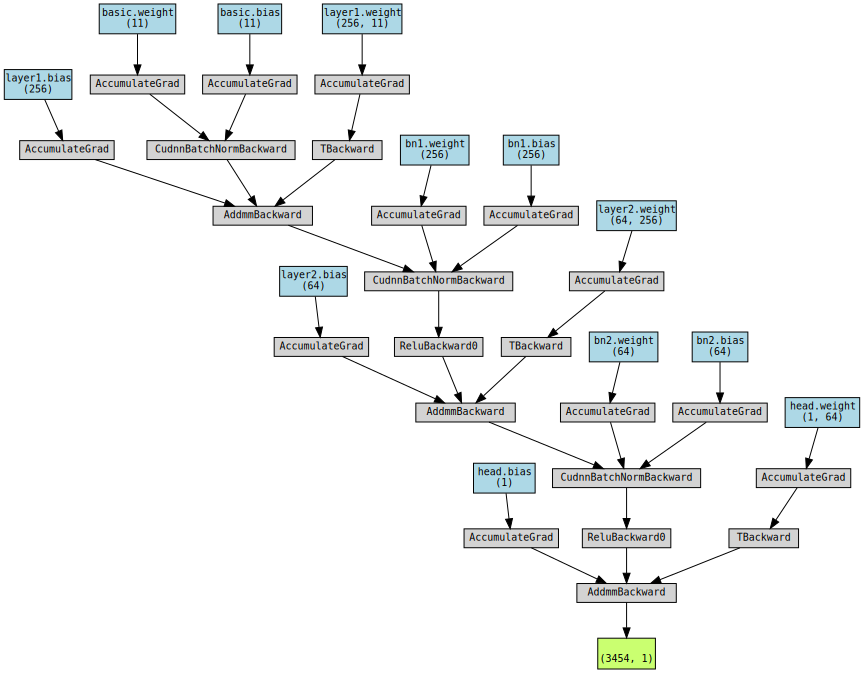

In [28]:
make_dot(deepmodel(x_test), params=dict(list(deepmodel.named_parameters())))

In [44]:
from torchsummary import summary
summary(deepmodel, (df.shape[1]-1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       BatchNorm1d-1                   [-1, 11]              22
            Linear-2                  [-1, 256]           3,072
       BatchNorm1d-3                  [-1, 256]             512
           Dropout-4                  [-1, 256]               0
            Linear-5                   [-1, 64]          16,448
       BatchNorm1d-6                   [-1, 64]             128
           Dropout-7                   [-1, 64]               0
            Linear-8                    [-1, 1]              65
Total params: 20,247
Trainable params: 20,247
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.08
Estimated Total Size (MB): 0.08
----------------------------------------------------------------


In [36]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
